# Ad-conversion A-B Testing
> Simple T-test to compare 2 samples of ad-conversions

- toc: true
- badges: true
- comments: true
- categories: [ABTest]
- image:

In [1]:
!wget https://github.com/sparsh-ai/reco-data/raw/master/abtest-sample-dayC1C2.csv

--2021-06-27 14:34:04--  https://github.com/sparsh-ai/reco-data/raw/master/abtest-sample-dayC1C2.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sparsh-ai/reco-data/master/abtest-sample-dayC1C2.csv [following]
--2021-06-27 14:34:04--  https://raw.githubusercontent.com/sparsh-ai/reco-data/master/abtest-sample-dayC1C2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 408 [text/plain]
Saving to: ‘abtest-sample-dayC1C2.csv’

abtest-sample-dayC1 100%[===================>]     408  --.-KB/s    in 0s      

2021-06-27 14:34:04 (13.0 MB/s) - ‘abtest-sample-dayC1C2.csv’ saved [408/408]



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss 

In [3]:
data= pd.read_csv("abtest-sample-dayC1C2.csv")
data.head(10)

,Day,Conversion_A,Conversion_B
0,1,0.15,0.19
1,2,0.12,0.20
2,3,0.18,0.18
3,4,0.19,0.22
4,5,0.17,0.19
5,6,0.13,0.17
6,7,0.14,0.18
7,8,0.23,0.20
8,9,0.11,0.17
9,10,0.15,0.22


Let’s plot the distribution of target and control group:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


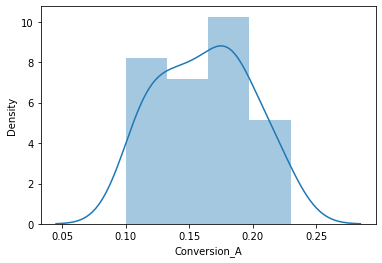

In [4]:
sns.distplot(data.Conversion_A)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


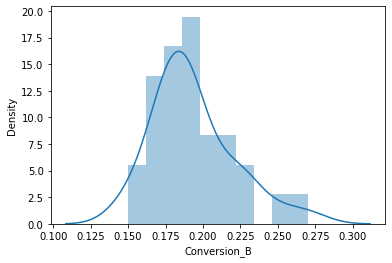

In [5]:
sns.distplot(data.Conversion_B)

Now, we will perform the t-test:

In [6]:
t_stat, p_val= ss.ttest_ind(data.Conversion_B,data.Conversion_A)
t_stat , p_val

(3.78736793091929, 0.000363796012828762)

For our example, the observed value i.e the mean of the test group is 0.19. The hypothesized value (Mean of the control group) is 0.16. On the calculation of the t-score, we get the t-score as .3787. and the p-value is 0.00036.

SO what does all this mean for our A/B Testing?

Here, our p-value is less than the significance level i.e 0.05. Hence, we can reject the null hypothesis. This means that in our A/B testing, newsletter B is performing better than newsletter A. So our recommendation would be to replace our current newsletter with B to bring more traffic on our website.